In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score as auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rbm import RBM
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df=pd.read_csv("creditcard.csv", sep=",", index_col=None, encoding="utf-8-sig")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df['Time']=StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df['Amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [5]:
df.iloc[:,[0]+[29]]

,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403
...,...,...
284802,1.641931,-0.350151
284803,1.641952,-0.254117
284804,1.641974,-0.081839
284805,1.641974,-0.313249


In [4]:
x_train=df.iloc[:200000, 1:-2].values
y_train=df.iloc[:200000, -1].values
x_test=df.iloc[200000:, 1:-2].values
y_test=df.iloc[200000:, -1].values

print("Shapes:\nx_train: %s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("Shapes:\nx_test: %s\ny_test:%s\n" % (x_test.shape, y_test.shape))

Shapes:
x_train: (200000, 28)
y_train:(200000,)

Shapes:
x_test: (84807, 28)
y_test:(84807,)



In [5]:
model=RBM(x_train.shape[1], 10, visible_unit_type='gauss', main_dir='./', model_name='rbm_model.ckpt',
          gibbs_sampling_steps=4, learning_rate=0.001, momentum=0.95, batch_size=512, num_epochs=20, verbose=1)

Validation cost at step 0: 0.97971845
Validation cost at step 1: 0.8982562
Validation cost at step 2: 0.8725883
Validation cost at step 3: 0.86291844
Validation cost at step 4: 0.85794985
Validation cost at step 5: 0.85426533
Validation cost at step 6: 0.85782343
Validation cost at step 7: 0.85460865
Validation cost at step 8: 0.8536495
Validation cost at step 9: 0.8489894
Validation cost at step 10: 0.85291535
Validation cost at step 11: 0.8534652
Validation cost at step 12: 0.84967667
Validation cost at step 13: 0.8456999
Validation cost at step 14: 0.8479422
Validation cost at step 15: 0.85381997
Validation cost at step 16: 0.84714323
Validation cost at step 17: 0.84717125
Validation cost at step 18: 0.85160273
Validation cost at step 19: 0.85121405


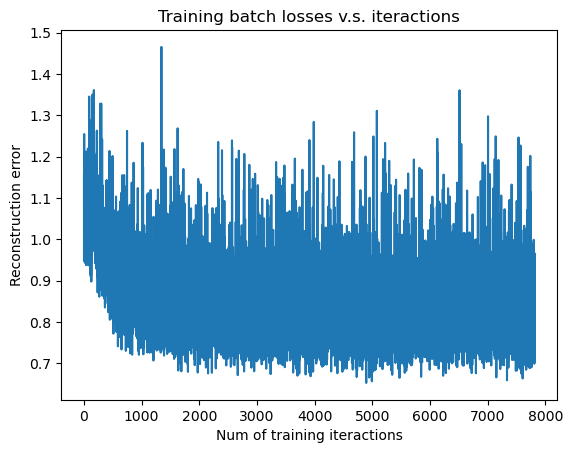

In [6]:
model.fit(x_train, validation_set=x_test)

In [7]:
costs=model.getFreeEnergy(x_test).reshape(-1)
score=auc(y_test, costs)
print(score)

INFO:tensorflow:Restoring parameters from ./rbm_model.ckpt
0.9557043551181189


In [8]:
normal=pd.DataFrame(costs[y_test==0])
normal.describe()

,0
count,84700.000000
mean,0.800070
std,87.098099
min,-7.606297
25%,-5.160915
50%,-3.923076
75%,-1.428982
max,21802.498047


In [10]:
anomaly=pd.DataFrame(costs[y_test==1])
anomaly.describe()

,0
count,107.000000
mean,88.029625
std,64.388084
min,-5.071871
25%,36.893932
50%,97.831032
75%,127.366627
max,229.572159


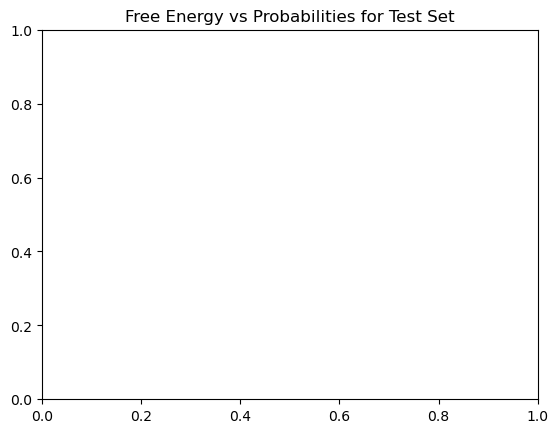

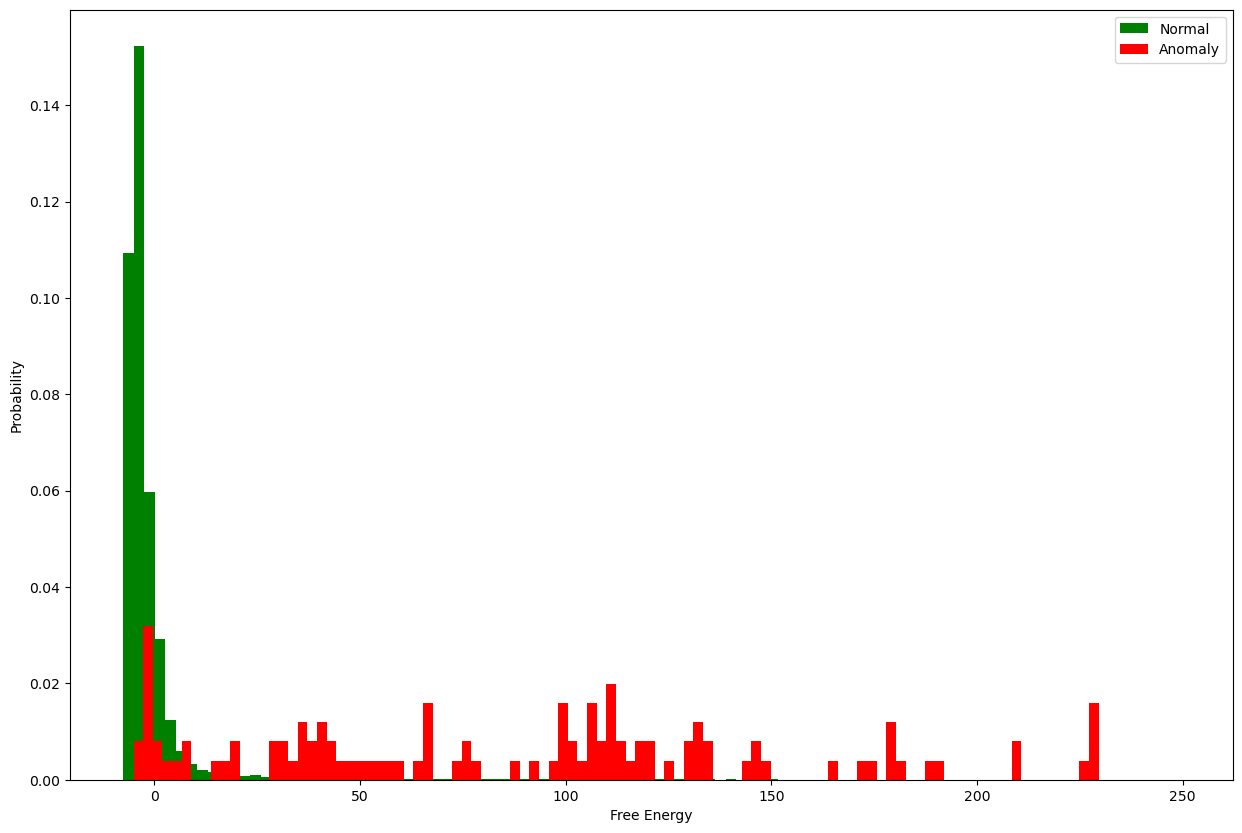

In [20]:
plt.title('Free Energy vs Probabilities for Test Set')
plt.figure(figsize=(15,10))
plt.xlabel('Free Energy')
plt.ylabel('Probability')
plt.hist(costs[(y_test==0)&(costs<250)], bins=100, color='green',density=True,  label='Normal')
plt.hist(costs[(y_test==1)&(costs<250)], bins=100, color='red',density=True,  label='Anomaly')

plt.legend(loc="upper right")